In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest
from pylab import mpl

In [2]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [4]:
train01 = pd.read_csv(r"……35个特征.csv")
train01=train01.drop('ID',axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,confusion_matrix
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import classification_report
cross_valid_scores = {}
X=train01.drop(['label'],axis=1)
y=train01.label
X_train, xtest, y_train, ytest = train_test_split(X, y, test_size=0.4, random_state=1,stratify=y)


In [7]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC(probability=True) 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

clf_svm = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
clf_svm.fit(X_train, y_train)
print(f'Best parameters {clf_svm.best_params_}')
print(f'Best score {clf_svm.best_score_}')

pred = clf_svm.predict_proba(xtest)
pred1 = clf_svm.predict(xtest)
pred2= pred[:, 1]

accuracy9=accuracy_score(ytest, pred1)
f9 = f1_score( ytest, pred1, average='macro' )
fpr9, tpr9, threshold = metrics.roc_curve(ytest, pred2)

confusion_matrix9 = confusion_matrix(ytest, pred1)
sensitivity9 = confusion_matrix9[0, 0] / (confusion_matrix9[0, 0] + confusion_matrix9[0, 1])
specificity9 = confusion_matrix9[1, 1] / (confusion_matrix9[1, 1] + confusion_matrix9[1, 0])

roc_auc9 = metrics.auc(fpr9, tpr9)
cross_valid_scores['SVM'] = clf_svm.best_score_
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{clf_svm.best_score_:.3f}'
)
print(f'--roc_auc9---{roc_auc9}')
print(f'--sensitivity9---{sensitivity9}')
print(f'--specificity9---{specificity9}')
print(f'--f9---{f9}')
print(f'--accuracy9---{accuracy9}')

Best parameters {'C': 1, 'kernel': 'linear'}
Best score 0.9055555555555556
Mean cross-validated accuracy score of the best_estimator: 0.906
--roc_auc9---0.9635416666666666
--sensitivity9---0.9166666666666666
--specificity9---0.9375
--f9---0.9270833333333333
--accuracy9---0.9285714285714286


In [8]:
import shap

In [9]:
explainer = shap.KernelExplainer(clf_svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/70 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

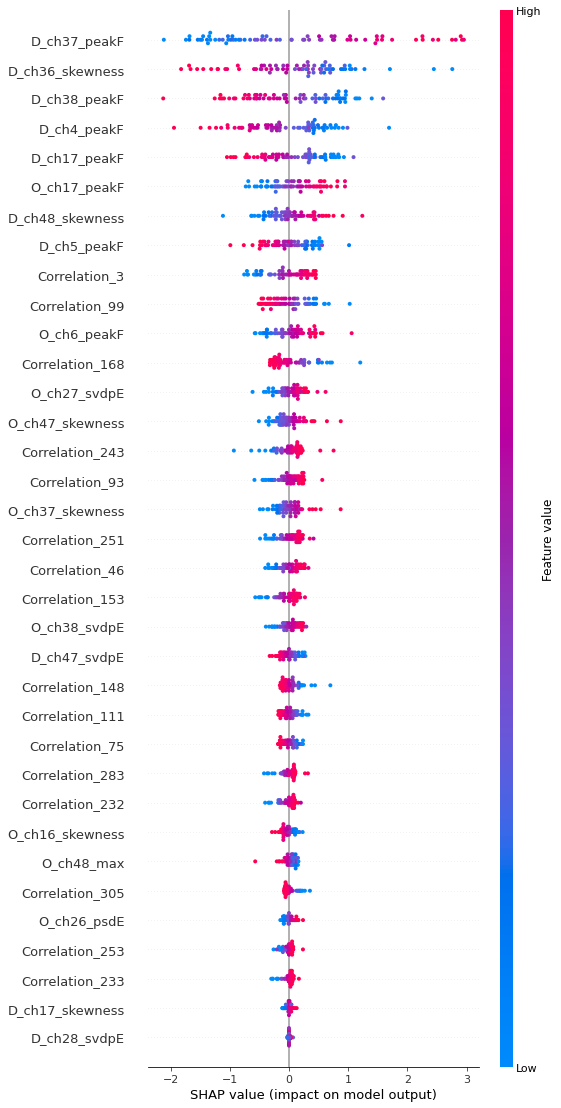

In [10]:
shap.summary_plot(shap_values[1], X,max_display=50,show = False)
# plt.savefig('shap.png', dpi=2000, bbox_inches='tight')

In [12]:
data = pd.read_csv('……特征画图1.csv')


In [14]:
# y includes our labels and x includes our features
y = data.label                          # 0 or 1
list = ['ID','label']
x = data.drop(list,axis = 1 )


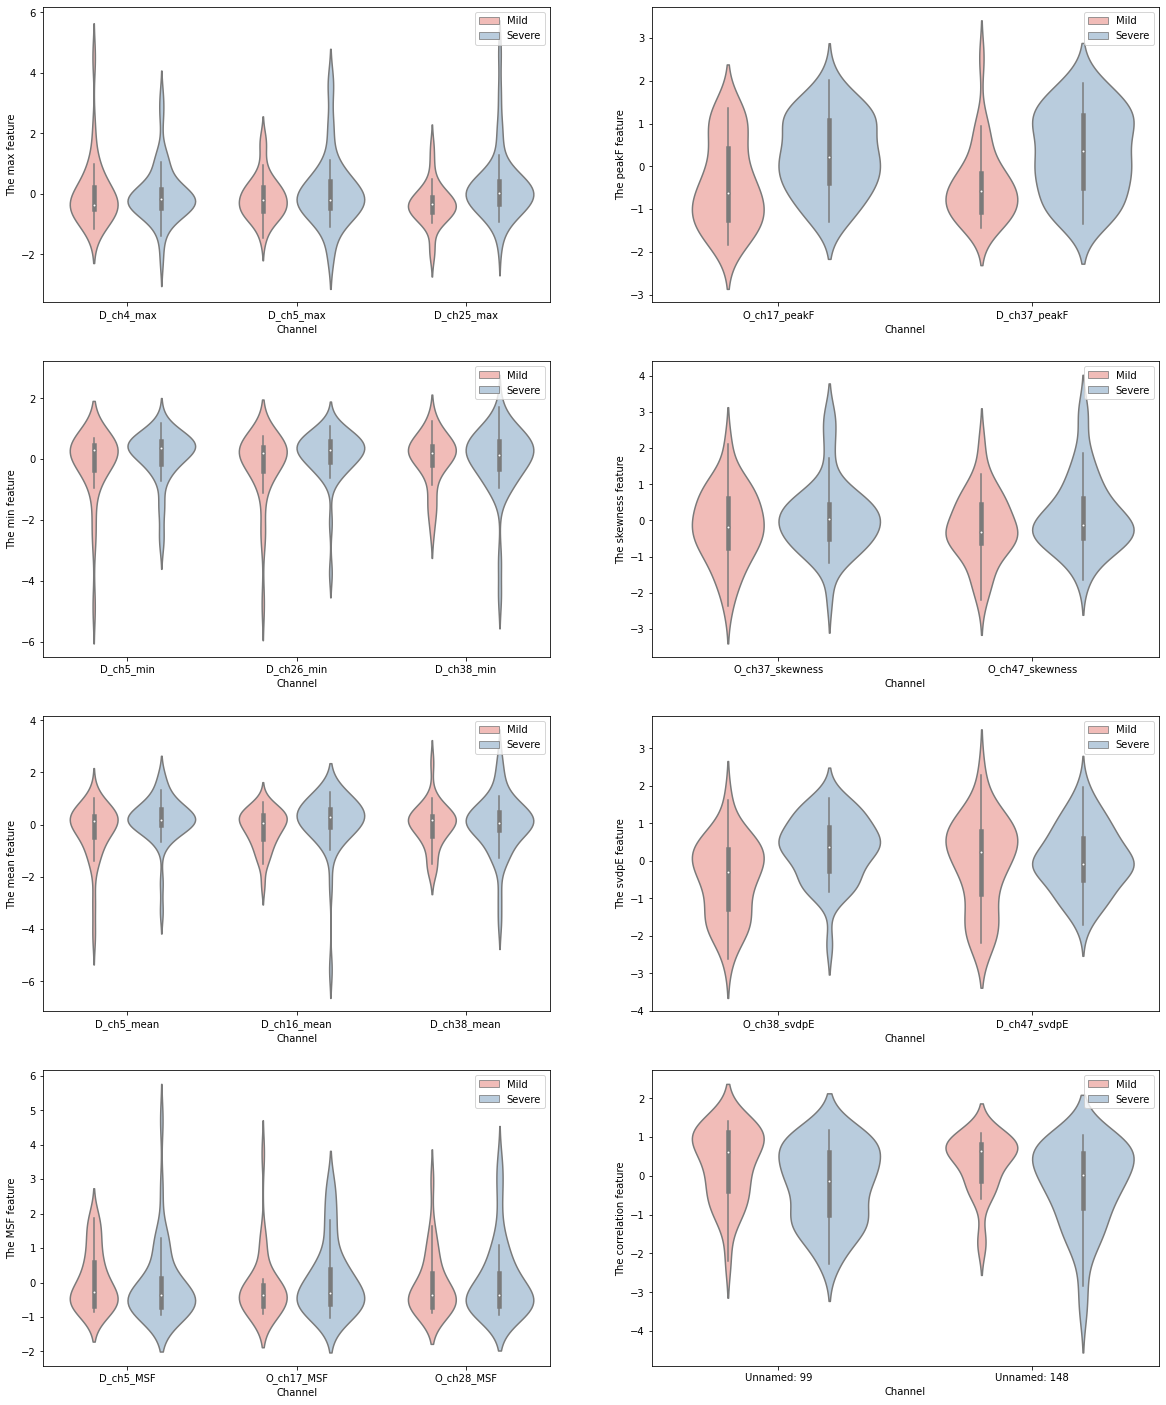

In [15]:

data_dia = y
data = x

data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:3]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The max feature')
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
# sns.set(context='notebook', style='ticks', font_scale=2, rc=rc)
ax=sns.violinplot(x="Channel",fontsize=10, y="The max feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])





data = pd.concat([y,data_n_2.iloc[:,3:6]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The min feature')
plt.subplot(4,2,3)
ax=sns.violinplot(x="Channel", fontsize=10, y="The min feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild','Severe'])

data = pd.concat([y,data_n_2.iloc[:,6:9]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The mean feature')
plt.subplot(4,2,5)
ax=sns.violinplot(x="Channel",fontsize=10, y="The mean feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])

data = pd.concat([y,data_n_2.iloc[:,9:12]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The MSF feature')
plt.subplot(4,2,7)
ax=sns.violinplot(x="Channel",fontsize=10, y="The MSF feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])




data_dia = y
data = x

data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,13:15]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The peakF feature')

# plt.figure(figsize=(5,25))
plt.subplot(4,2,2)
ax=sns.violinplot(x="Channel",fontsize=10, y="The peakF feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])

data = pd.concat([y,data_n_2.iloc[:,16:18]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The skewness feature')
plt.subplot(4,2,4)
ax=sns.violinplot(x="Channel", fontsize=10,y="The skewness feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])

data = pd.concat([y,data_n_2.iloc[:,19:21]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The svdpE feature')
plt.subplot(4,2,6)
ax=sns.violinplot(x="Channel",fontsize=10, y="The svdpE feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])

data = pd.concat([y,data_n_2.iloc[:,22:24]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="Channel",
                    value_name='The correlation feature')
plt.subplot(4,2,8)
ax=sns.violinplot(x="Channel", fontsize=10,y="The correlation feature", hue="label",data=data,palette="Pastel1",scale='count')
ax.legend(handles=ax.legend_.legendHandles, labels=['Mild', 'Severe'])

plt.savefig('小提琴图.png', dpi=600, bbox_inches='tight')

# plt.savefig('小提琴图.png')
